## Models 2: Decision Tree, Bagged Tree, Random Forest

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import scikitplot as skplt

In [2]:
# Import the dataset from the preprocessing stage
train_df = pd.read_csv('train_for_models.csv')
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [3]:
# Splitting the outcome and the predictor variables
target = train_df['Survived']
train_df = train_df.drop('Survived', axis=1)

In [4]:
# Create dummy variables
train_df = pd.get_dummies(train_df)
train_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.25, random_state=42)

In [6]:
# Build the first tree
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [7]:
# Feature importance
tree_clf.feature_importances_

array([0.07978263, 0.17879968, 0.10311596, 0.03893151, 0.        ,
       0.0762272 , 0.52314301, 0.        , 0.        , 0.        ,
       0.        ])

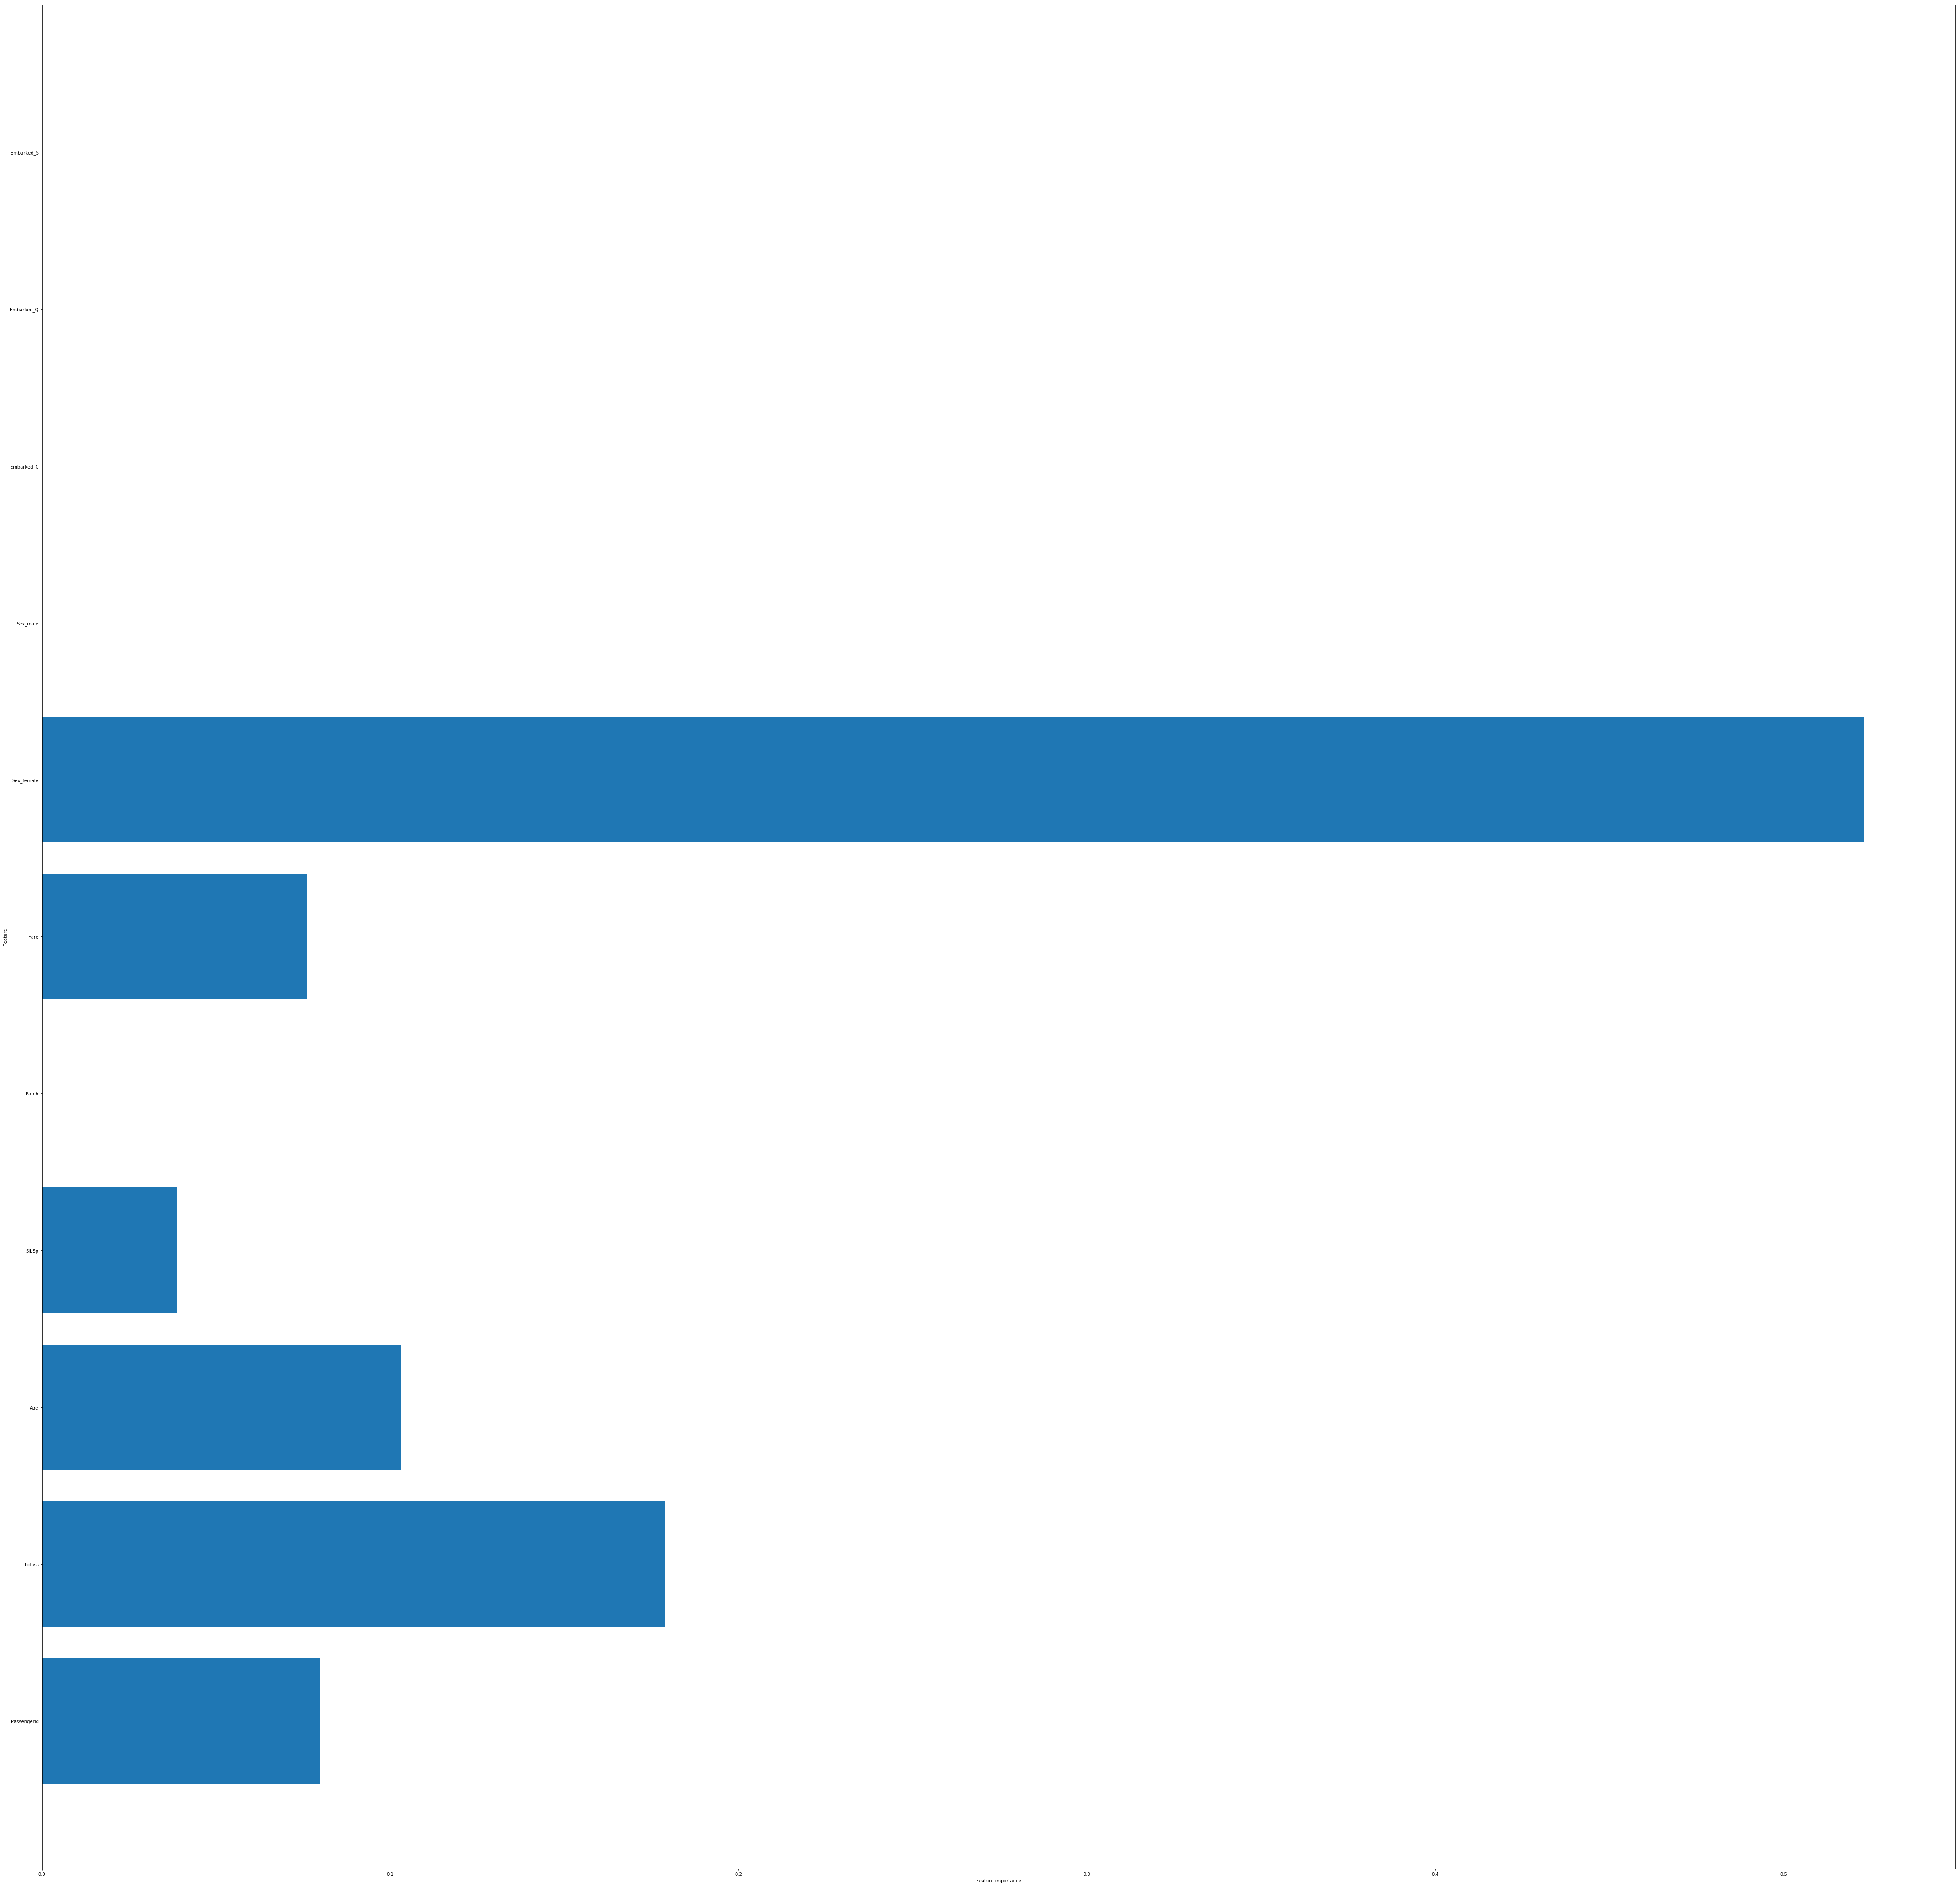

In [8]:
def plot_features_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(75,75))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_features_importances(tree_clf)

In [9]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[116  18]
 [ 24  65]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.78      0.73      0.76        89

    accuracy                           0.81       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [10]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred)*100))

Testing Accuracy for Decision Tree Classifier: 81.17%


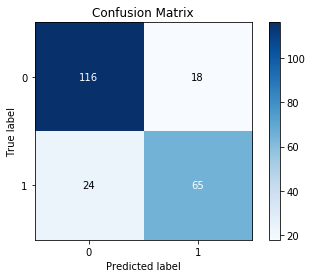

In [11]:
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=False, cmap = 'Blues')

## Bagged Trees

In [12]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

In [13]:
# Fit to training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [14]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.8787425149700598

In [15]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.8071748878923767

In [16]:
bagged_tree_preds = bagged_tree.predict(X_test)
print(classification_report(y_test, bagged_tree_preds))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       134
           1       0.82      0.66      0.73        89

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



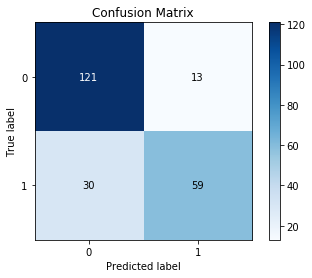

In [17]:
skplt.metrics.plot_confusion_matrix(y_test, bagged_tree_preds, normalize=False, cmap = 'Blues')

## Random Forests

In [18]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [19]:
forest.score(X_train, y_train)

0.8712574850299402

In [20]:
forest.score(X_test, y_test)

0.8161434977578476

In [21]:
forest_preds = forest.predict(X_test)
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       134
           1       0.82      0.70      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223



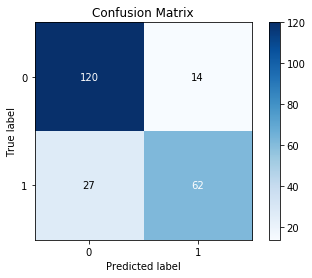

In [22]:
skplt.metrics.plot_confusion_matrix(y_test, forest_preds, normalize=False, cmap = 'Blues')

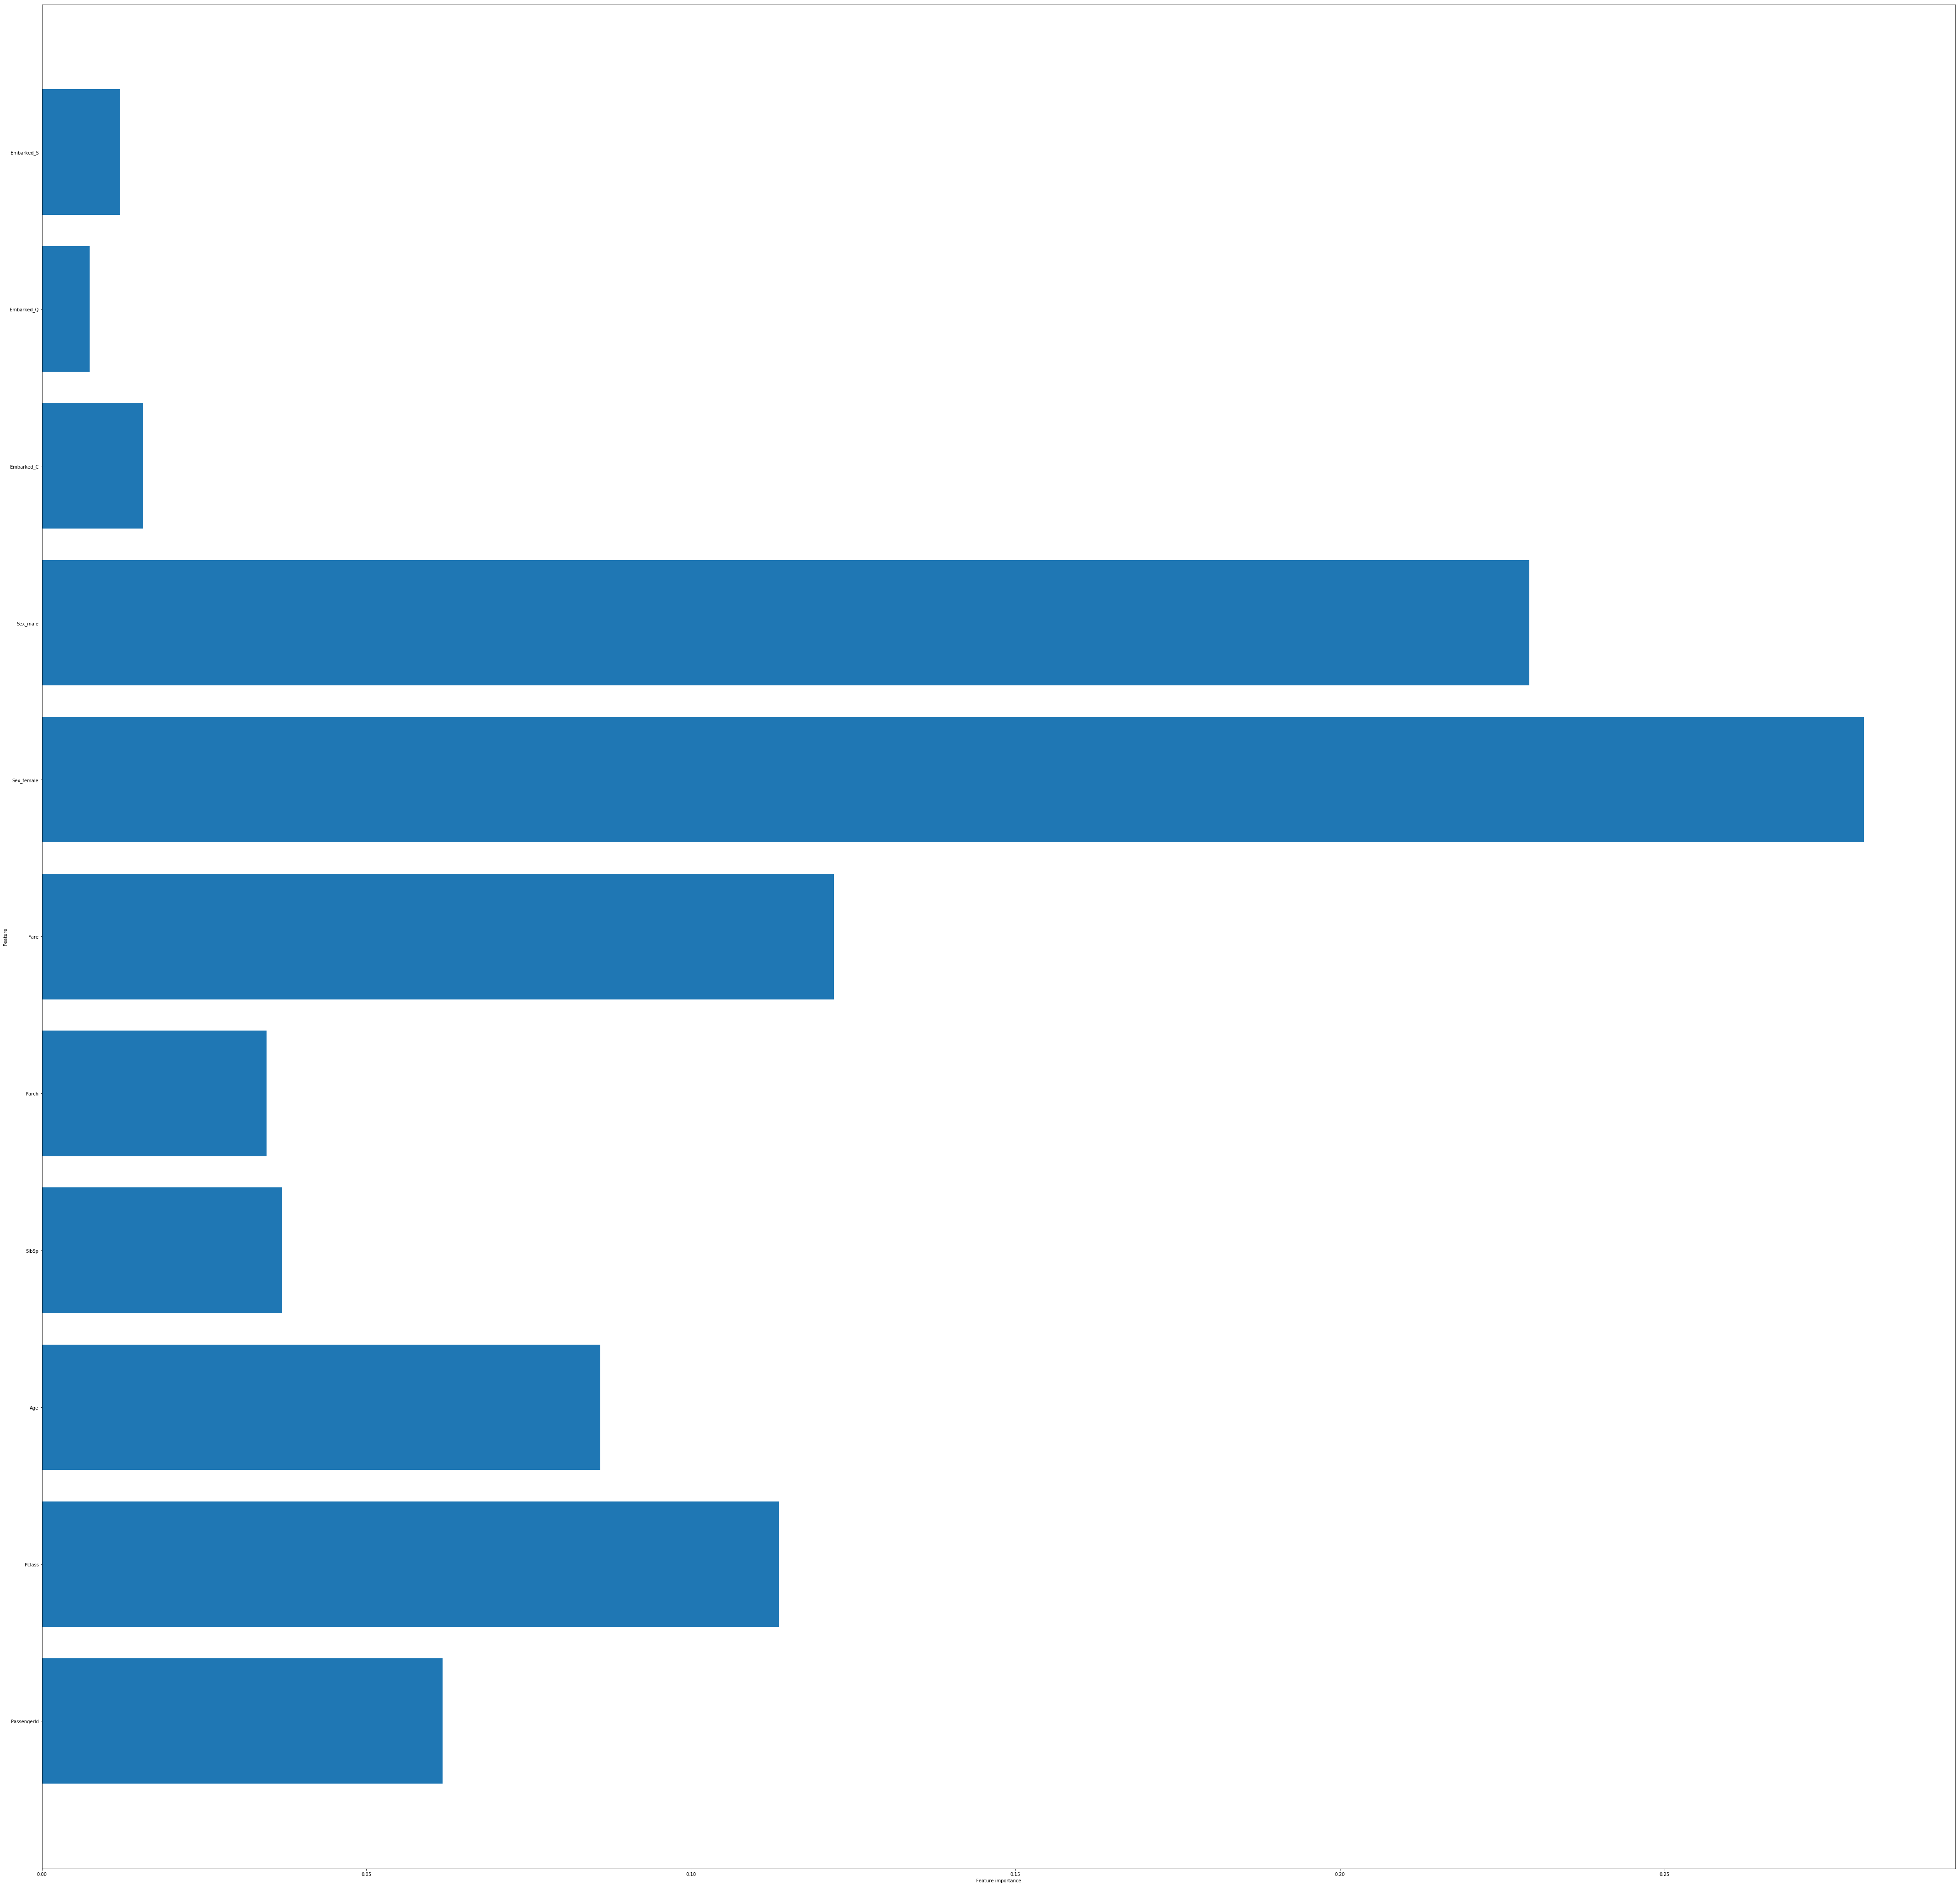

In [23]:
plot_features_importances(forest)

In [24]:
forest_2 = RandomForestClassifier(n_estimators=5, max_features=10, max_depth=2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [25]:
forest_2.score(X_train, y_train)

0.8083832335329342

In [26]:
forest_2.score(X_test, y_test)

0.8026905829596412

In [27]:
forest_2_preds = forest_2.predict(X_test)
print(classification_report(y_test, forest_2_preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       134
           1       0.77      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



## Implementing Gridsearch

In [32]:
dt_clf = RandomForestClassifier()
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score: .2%}")

Mean Cross Validation Score:  79.49%


In [33]:
dt_param_grid = {'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 3, 4, 5, 6],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

In [34]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [35]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 85.04%
Mean Test Score: 80.72%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [36]:
# Best Forest Classifier
forest_3 = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, min_samples_split=2)
forest_3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [37]:
forest_3.score(X_train, y_train)

0.8607784431137725

In [38]:
forest_3.score(X_test, y_test)

0.8161434977578476

In [39]:
forest_3_preds = forest_3.predict(X_test)
print(classification_report(y_test, forest_3_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       134
           1       0.82      0.70      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223



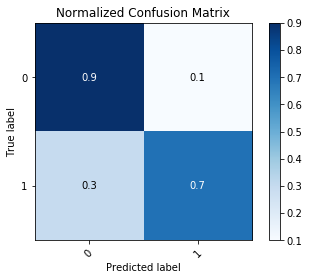

In [57]:
skplt.metrics.plot_confusion_matrix(y_test, forest_3_preds, normalize=True, cmap = 'Blues', x_tick_rotation=45)

In [40]:
rf_param_grid = {'n_estimators': [10, 30, 100],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 2, 6, 10],
                 'min_samples_split': [5, 10],
                 'min_samples_leaf': [3,6]
    
}

In [41]:
rf_grid_search = GridSearchCV(forest_3, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Testing Accuracy: {rf_grid_search.best_score_: .2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy:  81.44%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 10}


In [50]:
forest_4=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=10)
forest_4.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=10)

In [51]:
forest_4.score(X_train, y_train)

0.8607784431137725

In [52]:
forest_4.score(X_test, y_test)

0.820627802690583

In [53]:
forest_4_preds = best_forest.predict(X_test)

In [54]:
print(classification_report(y_test, forest_4_preds))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       134
           1       0.78      0.65      0.71        89

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



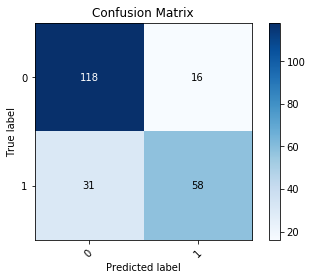

In [55]:
skplt.metrics.plot_confusion_matrix(y_test, forest_4_preds, normalize=False, cmap = 'Blues', x_tick_rotation=45)

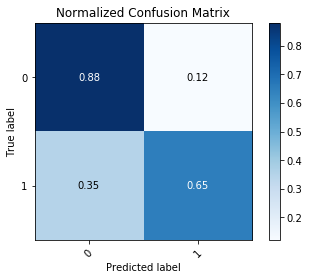

In [56]:
skplt.metrics.plot_confusion_matrix(y_test, forest_4_preds, normalize=True, cmap = 'Blues', x_tick_rotation=45)